In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 取得日射熱補正係数から日よけの長さを推定する方法

外皮の簡易入力法から外皮情報（LV1）を推定する方法の中で、取得日射熱補正係数から日よけの長さを推定する方法を作成したため、残しておく。  
外皮の簡易入力法からUA値・ηA値を計算し、これらの指標から外皮情報を推定する方法を作成する一方で、  
外皮の簡易入力法から直接外皮情報を計算するルートは設けないように変更したため、取得日射熱補正係数から日よけの長さを推定する方法が必要なくなった。

#### 1) 壁面からの日除けの張り出し寸法

取得日射熱補正係数を指定する場合

$$
z_H = b_H \frac{c_H y_1 + y_2}{ \frac{f_H}{0.01} - a_H }
$$

ただし、$f_H$が0.72を超える場合は$f_H=0.72$とする。また、$z_H$が5.0を超える場合は$z_H=5.0$とする。

$$
z_C = b_C \frac{c_C y_1 + y_2}{ \frac{f_C}{0.01} - a_C }
$$

ただし、$f_H$が0.93を超える場合は$f_C=0.93$とする。また、$z_C$が5.0を超える場合は$z_C=5.0$とする。

取得日射熱補正係数を指定しない場合

$$ z_H = \frac{ ( y_1 + y_2 ) }{ l_{H,2} } $$

$$z_C=0$$

$z_H$：暖房期の壁面から日除けの張り出し寸法, m  
$z_C$：冷房期の壁面から日除けの張り出し寸法, m  
$f_H$: 暖房期の取得日射熱補正係数  
$f_C$: 冷房期の取得日射熱補正係数  
$y_{1}$：日除け下端から窓上端までの垂直方向の距離, m  
$y_{2}$：窓の開口高さ, m  

$$y_1=0$$

$$y_2=1.1$$

$$l_{H,2}=\frac{1}{0.3}$$

| 季節 | 地域区分 | 方位 | a | b | c |
|:---:|:---:|:---:|:---:|:---:|:---:|
| 暖房期 | 1地域～7地域 | 南東(SE) | 5 | 20 | 3 |
| 暖房期 | 1地域～7地域 | 南西(SW) | 5 | 20 | 3 |
| 暖房期 | 1地域～7地域 | 北西(NW) | 10 | 15 | 2 |
| 暖房期 | 1地域～7地域 | 北東(NE) | 10 | 15 | 2 |

| 季節 | 地域区分 | 方位 | a | b | c |
|:---:|:---:|:---:|:---:|:---:|:---:|
| 冷房期 | 1地域～7地域 | 南東(SE) | 16 | 24 | 2 |
| 冷房期 | 1地域～7地域 | 南西(SW) | 16 | 24 | 2 |
| 冷房期 | 1地域～7地域 | 北西(NW) | 16 | 24 | 2 |
| 冷房期 | 1地域～7地域 | 北東(NE) | 16 | 24 | 2 |
| 冷房期 | 8地域 | 南東(SE) | 16 | 19 | 2 |
| 冷房期 | 8地域 | 南西(SW) | 16 | 19 | 2 |
| 冷房期 | 8地域 | 北西(NW) | 16 | 24 | 2 |
| 冷房期 | 8地域 | 北東(NE) | 16 | 24 | 2 |

In [2]:
def get_heating_overhang_width(is_f_value_input, region, direction, y1, y2, f=None):

    if is_f_value_input:
        
        if region <= 7:
            a, b, c = {
                'se': ( 5, 20, 3),
                'sw': ( 5, 20, 3),
                'nw': (10, 15, 2),
                'ne': (10, 15, 2)
            }[direction]
        elif region == 8:
            raise ValueError('z_Hを取得する関数で地域が8地域を指定されました。')
        else:
            raise ValueError('z_Hを取得する関数でregionに不正な値が指定されました。')
        
        _f = min(f, 0.72)
        
        if ( ( _f / 0.01 ) - a) <= 0: 
            return 5.0
        else:
            return min( ( b * ( c * y1 + y2) ) / ( ( _f / 0.01 ) - a ), 5.0 )

    else:
        
        l_h_2 = 1 / 0.3
        
        return ( y1 + y2 ) / l_h_2        

In [3]:
def get_cooling_overhang_width(is_f_value_input, region, direction, y1, y2, f=None):

    if is_f_value_input:
        
        if region <= 7:
            a, b, c = {
                'se': (16, 24, 2),
                'sw': (16, 24, 2),
                'nw': (16, 24, 2),
                'ne': (16, 24, 2)
            }[direction]
        elif region == 8:
            a, b, c = {
                'se': (16, 19, 2),
                'sw': (16, 19, 2),
                'nw': (16, 24, 2),
                'ne': (16, 24, 2)
            }[direction]
        else:
            raise ValueError('z_Cを取得する関数でregionに不正な値が指定されました。')
            
        _f = min(f, 0.93)
        
        if ( ( _f / 0.01 ) - a) <= 0: 
            return 5.0
        else:
            return min( ( b * ( c * y1 + y2) ) / ( ( _f / 0.01 ) - a ), 5.0 )
    
    else:
        
        return 0.0

1地域～7地域

$$z=\frac{z_H + z_C}{2}$$

8地域

$$ z = z_C $$

$z$：壁面から日除けの張り出し寸法, m  

In [4]:
def get_y1_y2_z(is_f_value_input, region, direction, f_h=None, f_c=None):
    
    y1, y2 = 0.0, 1.1 
    
    if region == 8:
        z_c = get_cooling_overhang_width(is_f_value_input, region, direction, y1, y2, f_c)
        z = z_c
    else:
        z_h = get_heating_overhang_width(is_f_value_input, region, direction, y1, y2, f_h)
        z_c = get_cooling_overhang_width(is_f_value_input, region, direction, y1, y2, f_c)
        z = ( z_h + z_c ) / 2
        
    return y1, y2, z

#### Example

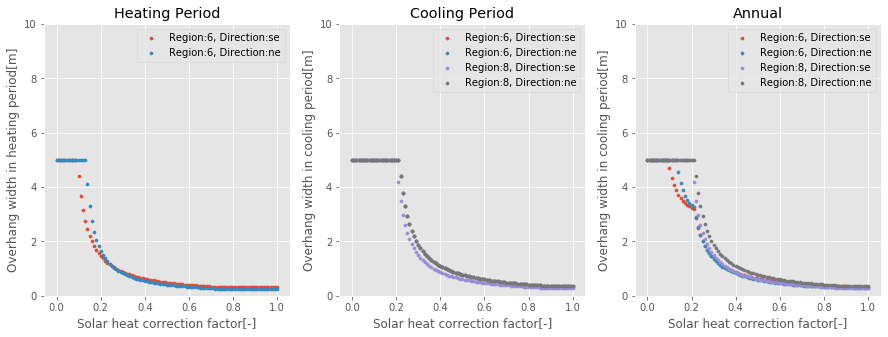

In [5]:
# 取得日射熱補正係数の配列を用意
xs = np.arange( 0.0, 1.01, 0.01 )

windows = [
    {'region': 6, 'direction': 'se'},
    {'region': 6, 'direction': 'ne'},
    {'region': 8, 'direction': 'se'},
    {'region': 8, 'direction': 'ne'}
]

y1, y2 = 0.0, 1.1

fig = plt.figure(figsize = (15, 5))
plt.style.use('ggplot')

# 暖房期 
ax0 = fig.add_subplot(1, 3, 1)
for window in windows:
    if window['region'] >= 8:
        continue
    else:
        z_h = [get_heating_overhang_width(is_f_value_input=True, region=window['region'], direction=window['direction'],
                                          y1=y1, y2=y2, f=f) for f in xs]
        label =  'Region:' + str(window['region']) + ', Direction:' + window['direction']
        ax0.scatter(xs, z_h, 10, label=label)
ax0.set_title('Heating Period')
ax0.set_xlabel('Solar heat correction factor[-]')
ax0.set_ylabel('Overhang width in heating period[m]')
ax0.set_ylim(0,10)
ax0.legend()

# 冷房期
ax1 = fig.add_subplot(1, 3, 2)
for window in windows:
    z_c = [get_cooling_overhang_width(is_f_value_input=True, region=window['region'], direction=window['direction'],
                                      y1=y1, y2=y2, f=f) for f in xs]
    label =  'Region:' + str(window['region']) + ', Direction:' + window['direction']
    ax1.scatter(xs, z_c, 10,label = label)
    
ax1.set_title('Cooling Period')
ax1.set_xlabel('Solar heat correction factor[-]')
ax1.set_ylabel('Overhang width in cooling period[m]')
ax1.set_ylim(0,10)
ax1.legend()

# 通年
ax3 = fig.add_subplot(1,3,3)
for window in windows:
    z = [get_y1_y2_z(is_f_value_input=True, region=window['region'], direction=window['direction'], f_h=f, f_c=f)[2] for f in xs]
    label = 'Region:' + str(window['region']) + ', Direction:' + window['direction']
    ax3.scatter(xs, z, 10, label=label)

ax3.set_title('Annual')
ax3.set_xlabel('Solar heat correction factor[-]')
ax3.set_ylabel('Overhang width in cooling period[m]')
ax3.set_ylim(0,10)
ax3.legend()
    
plt.show()